In [23]:
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
train = pd.read_csv('data/train.csv')

train.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [4]:
test = pd.read_csv('data/test.csv')

test.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge
0,ISIC_0052060,IP_3579794,male,70.0,NaN
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity
2,ISIC_0058510,IP_7960270,female,55.0,torso
3,ISIC_0073313,IP_6375035,female,50.0,torso
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity


Examples WITH Melanoma


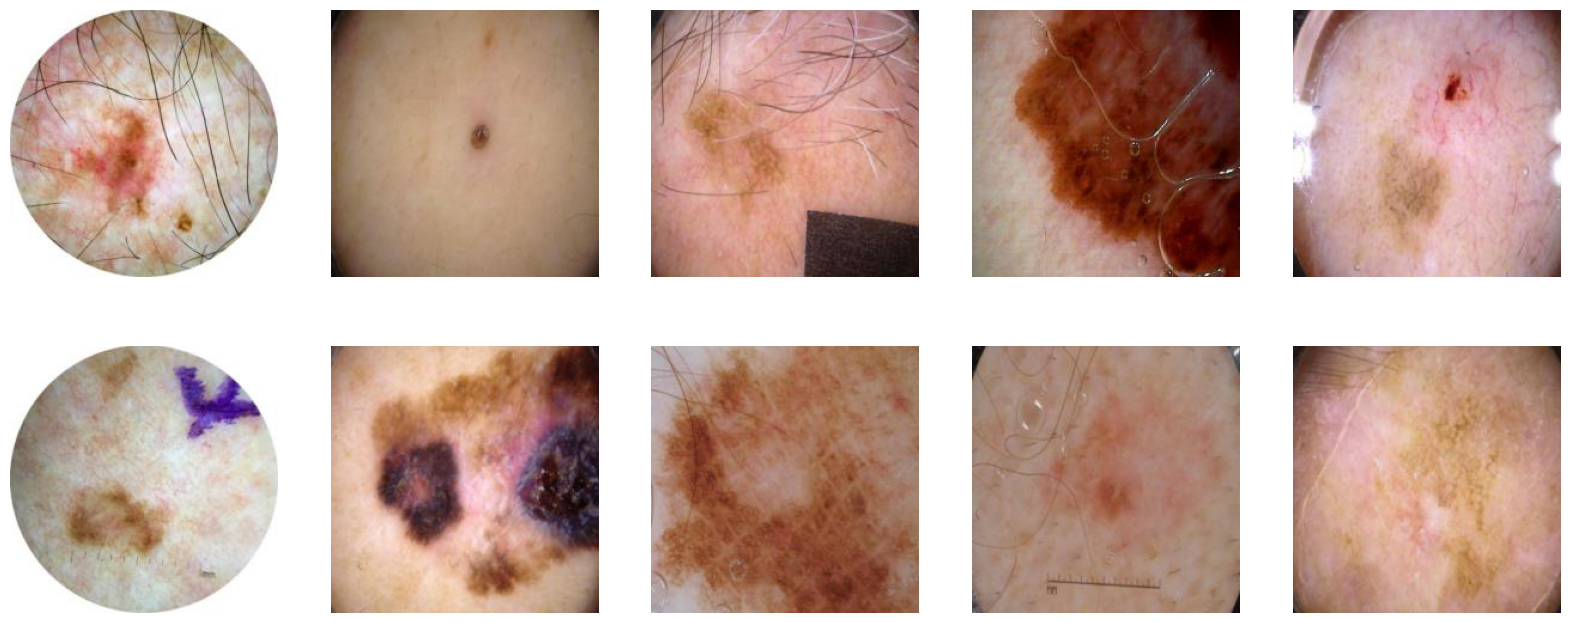

Examples WITHOUT Melanoma


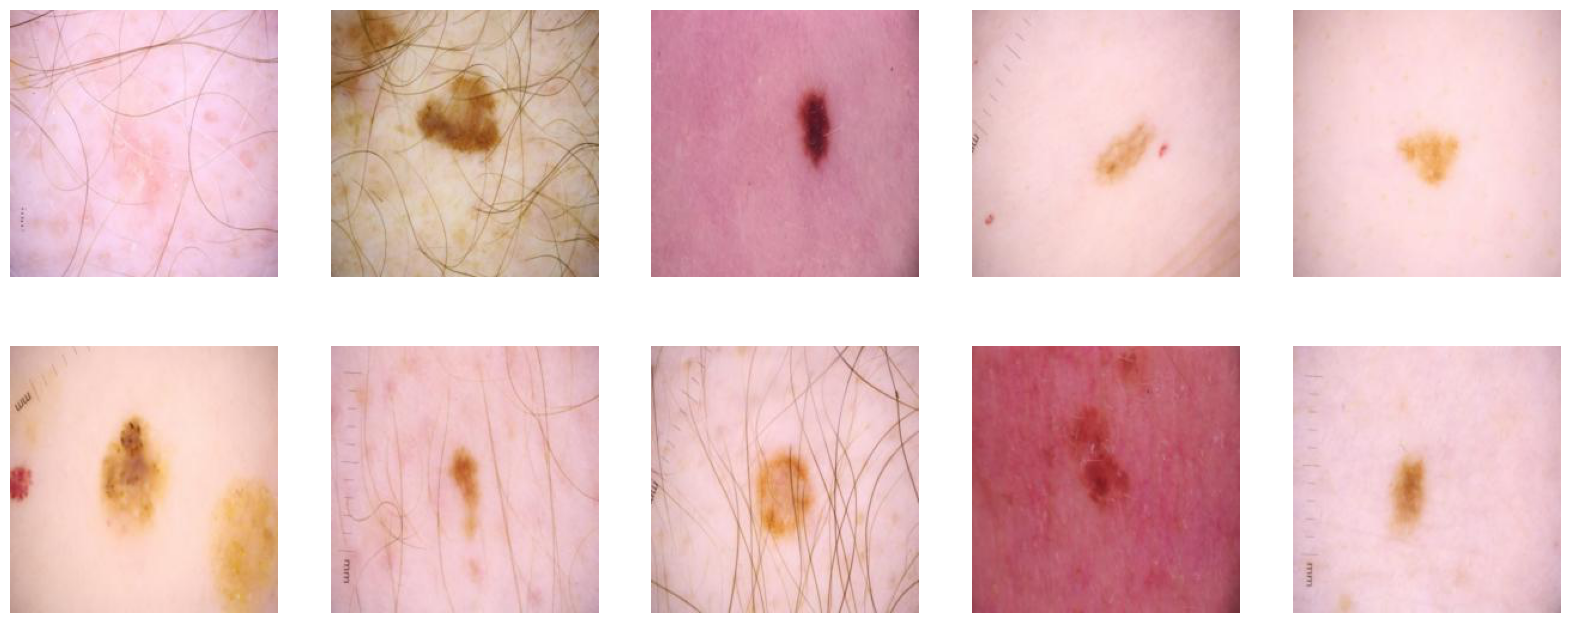

In [5]:
print('Examples WITH Melanoma')
imgs = train.loc[train.target==1].sample(10).image_name.values
plt.figure(figsize=(20,8))
for i,k in enumerate(imgs):
    img = cv.imread('data/jpeg224/train/%s.jpg'%k)
    img = cv.cvtColor(img, cv.COLOR_RGB2BGR)
    plt.subplot(2,5,i+1); plt.axis('off')
    plt.imshow(img)
plt.show()
print('Examples WITHOUT Melanoma')
imgs = train.loc[train.target==0].sample(10).image_name.values
plt.figure(figsize=(20,8))
for i,k in enumerate(imgs):
    img = cv.imread('data/jpeg224/train/%s.jpg'%k)
    img = cv.cvtColor(img, cv.COLOR_RGB2BGR)
    plt.subplot(2,5,i+1); plt.axis('off')
    plt.imshow(img)
plt.show()

In [9]:
train['target'].value_counts()

0    32542
1      584
Name: target, dtype: int64

<AxesSubplot: >

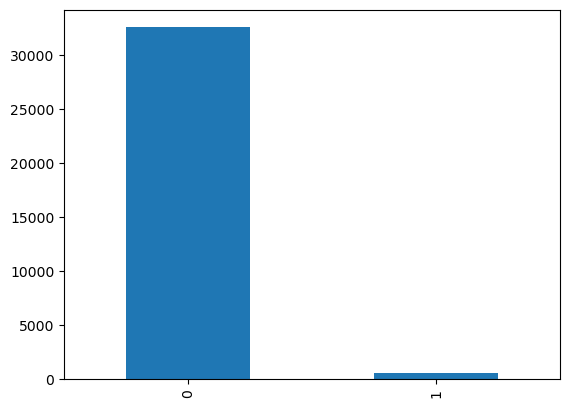

In [12]:
train['target'].value_counts().plot(kind='bar')

In [13]:
1 - 584/32542

0.9820539610349702

<AxesSubplot: >

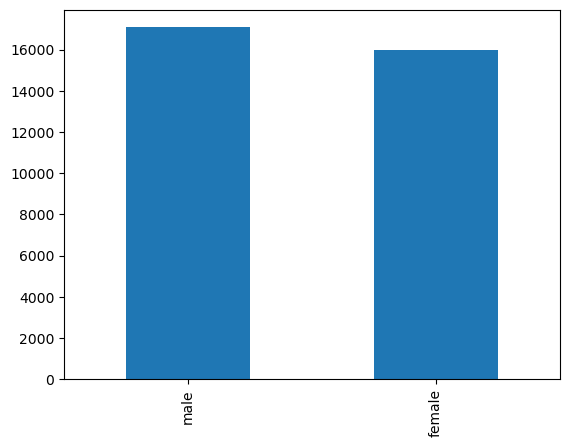

In [14]:
train['sex'].value_counts().plot(kind='bar')

<AxesSubplot: >

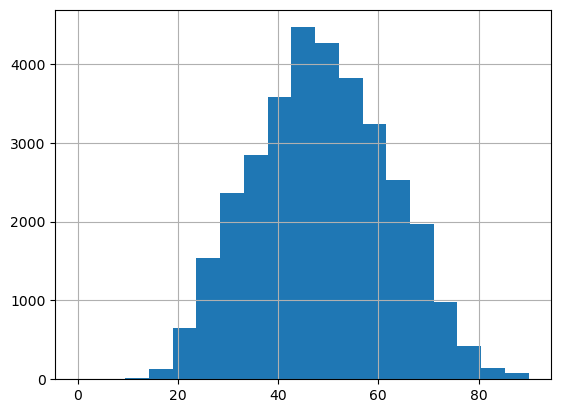

In [18]:
train['age_approx'].hist(bins=len(train['age_approx'].unique()))

<AxesSubplot: >

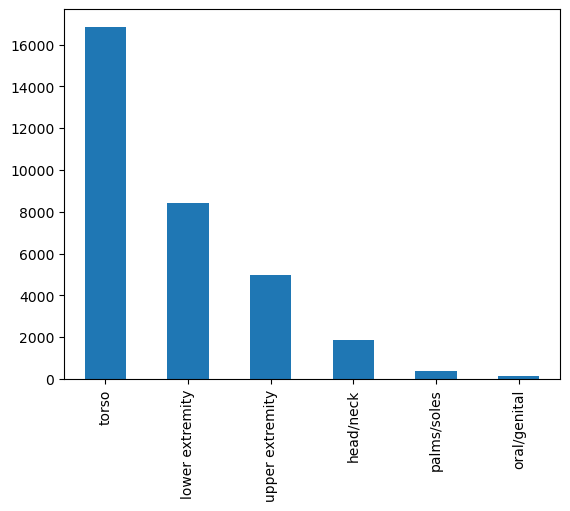

In [19]:
train['anatom_site_general_challenge'].value_counts().plot(kind='bar')

In [20]:
from sklearn.model_selection import train_test_split

train_split, val_split = train_test_split(train, test_size=0.33, shuffle=True, random_state=42, stratify=train['target'])

train_split.shape, val_split.shape

((22194, 8), (10932, 8))

In [21]:
_, subset = train_test_split(train_split, test_size=0.1, shuffle=True, random_state=42, stratify=train_split['target'])

subset.shape

(2220, 8)

In [22]:
train_split.to_csv('data/train_split.csv', index=False)
val_split.to_csv('data/val_split.csv', index=False)
subset.to_csv('data/subset.csv', index=False)

In [25]:
PATH = 'data/'

os.listdir(PATH)

['archive (12).zip',
 'jpeg224',
 'sample_submission.csv',
 'test.csv',
 'train.csv',
 'train_split.csv',
 'val_split.csv',
 'subset.csv']